In [1]:
from tensorflow.keras.datasets import mnist
(train_images , train_labels ) ,( test_images , test_labels) = mnist.load_data()


print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [2]:
# 첫 번째 데이터를  본다
print(test_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 25

In [3]:
#출력 설정 
# 데이터의 타입을 확인한다
print(type(test_images))

import numpy as np
# Numpy array 하나의 행을 한 줄에서 보도록 설정
# linewidth : 한줄에 출력할 문자의 최대수  np.inf 는 무한
np.set_printoptions(linewidth=np.inf)

<class 'numpy.ndarray'>


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  84 185 159 151  60  36   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 222 254 254 254 254 241 198 198 198 198 198 198 198 19

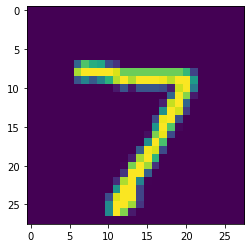

In [4]:
# 재출력
print(test_images[0])


# 각 셀의 숫자는 0~255의 색상값이다.
# 컬러로 출력을 해본다
import matplotlib.pyplot as plt
plt.imshow(test_images[0])

#### 데이터 슬라이싱

In [5]:
#특정 구간의 데이터만 가져와 본다
my_slice = test_images[0:100]
print(my_slice.shape)

# 3차원 데이터이므로, 위의 코드는 다음과도 동일하다.
my_slice = test_images[0:100, :28, :28]
my_slice = test_images[0:100, : , :]

(100, 28, 28)


#### Label 정보 출력

In [6]:
print(len(train_labels))
print(len(test_labels))

print(train_labels)
print(test_labels)


60000
10000
[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


#### Layer 쌓기 

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [8]:
model = models.Sequential() # 모델을 초기화

In [9]:
# 은닉층 설정. 특성의 수와 같은 1024개의 유닛을 갖는 은닉층을 설정한다.
# 처음에는 입력 shape을 설정한다. 3차원 데이터를 2차원으로 변형할 것이다. input_shape(특성의 수, 샘플의 수)
# 단, 샘플의 개수는 몇 개가 올지 알 수 없으므로 비워둔다.
model.add(layers.Dense(512, activation = 'relu' , input_shape= (28*28,)))

In [10]:
# 출력층 설정. 숫자의 종류가 10개이므로, 10개의 유닛을 갖는 출력층을 설정한다.
# 10개의 각각에 대한 확률정보 출력. Softmax 층은 확률 점수를 출력한다. 
model.add(layers.Dense(10 , activation ='softmax'))

In [11]:
model.compile(loss= 'categorical_crossentropy' , optimizer = 'rmsprop', metrics = ['accuracy'])

# loss : loss function : 훈련 데이터에서 신경망의 성능을 측정하는 손실 함수
# optimizer : 입력된 데이터와 손실 함수를 기반으로 가중치를 업데이트하는 방법
# metrics : 훈련과 테스트 과정을 모니터링할 지표. 여기서는 정확도만 고려. 'acc'라고도 씀

In [12]:
print(test_images[1,])
# 현재 데ㅣ터는 (60000,28,28)dml 3차원이면서 , 0~255 사이의 숫자(색의 번호)로 되어 있음
# 이 데이터를 해석하기에 용이하도록 (60000,784)의 2차원 데이터로 변환하고, 값을 0~1이 되게함. 신경망 알고리즘은 스켈이에 민감함


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  31  18   0   0   0   0 209 253 253  65   0   

#### 데이터 변환

In [13]:
train_images = train_images.reshape(60000,28*28)
train_images = train_images.astype('float32')/255

test_images =test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32')/255

# reshape 함수를 이용해 데이터를 (60000,784) 크기로 변환하고, 각 값을 나누되, type을 소수점을 받는 float32으 형을 맞춤

#### 전처리 후

In [14]:
np.set_printoptions(linewidth=310)
print(test_images[1])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.      

In [15]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 또한, label을 범주형으로 만들어 분류 알고리즘에 적합한 형태가 되게함



#### 데이터 학습

In [16]:

model.fit(train_images ,train_labels ,epochs =5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2564 - accuracy: 0.9251
Epoch 2/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1050 - accuracy: 0.9687
Epoch 3/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0697 - accuracy: 0.9794
Epoch 4/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0504 - accuracy: 0.9847
Epoch 5/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0372 - accuracy: 0.9886


In [17]:
test_loss, test_acc = model.evaluate(test_images ,test_labels)
print( 'test_acc: ', test_acc)

# evaluate 함수로 테스트 데이터의 정확도를 볼 수 있음
# 10000 개의 데이터를 예측하고, 정확도 98.1% 산출

10000/10000 [==============================] - 2s 168us/sample - loss: 0.0659 - accuracy: 0.9817
test_acc:  0.9817


In [18]:
len(test_images)

10000

In [19]:
len(test_labels)

10000

## Tensorflow's Data type
- Tensor는 데이터를 담는 자료형을 의미한다.
        o Scala (0D Tensor)
                하나의 숫자만 담고 있는 텐서는 축(axis, dimesion)이 없으므로 0D tensor이다.
                Numpy 에서는 float32, float64 타입의 숫자가 scala Tensor로 사용된다.
                축의 개수는 ndim 속성을 이용하여 알 수 있다.
        o Vector (1D Tensor)
                다음과 같이 하나의 축으로 된 배열을 vector
        o Matrix 
                벡터가 2개의 축으로 결합된 것
                Row와 column으로 구성
        o 3D & High-dimensional tensor
                행렬을 하나의 새로운 배열을 합치면 큐브로 해석될 수 있는 3D 텐서가 만들어진다.
                이와 같은 식으로 딥러닝에서는 4D 텐서까지 만들어 사용
                동영상 데이터는 5D 텐서까지 가기도 함
